In [1]:
from sklearn.preprocessing import StandardScaler                       # Import modules
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from adjustText import adjust_text
import numpy as np
from pydataset import data
import plotly.graph_objects as go

A data frame with 32 observations on 11 (numeric) variables.

- [, 1]	mpg	Miles/(US) gallon
- [, 2]	cyl	Number of cylinders
- [, 3]	disp	Displacement (cu.in.)
- [, 4]	hp	Gross horsepower
- [, 5]	drat	Rear axle ratio
- [, 6]	wt	Weight (1000 lbs)
- [, 7]	qsec	1/4 mile time
- [, 8]	vs	Engine (0 = V-shaped, 1 = straight)
- [, 9]	am	Transmission (0 = automatic, 1 = manual)
- [,10]	gear	Number of forward gears

In [2]:
mtcars = data('mtcars')                                                # Load dataset mtcars
mtcars.head() 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
subset_mtcars = mtcars.iloc[:, [0, 2, 3, 4, 5, 6]]                     # Subset mtcars
subset_mtcars.head() 

,mpg,disp,hp,drat,wt,qsec
Mazda RX4,21.0,160.0,110,3.90,2.620,16.46
Mazda RX4 Wag,21.0,160.0,110,3.90,2.875,17.02
Datsun 710,22.8,108.0,93,3.85,2.320,18.61
Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44
Hornet Sportabout,18.7,360.0,175,3.15,3.440,17.02


In [4]:
scaler = StandardScaler()                                              # Create standardization scaler
mtcars_std = scaler.fit_transform(subset_mtcars)                       # Standardize data
pca = PCA()                                                            # Compute PCA without reducing dimensionality
mtcars_pca = pca.fit_transform(mtcars_std)

In [5]:
explained_variance = pd.DataFrame([pca.explained_variance_ratio_,      # Extract explained variance per component
                                   pca.explained_variance_ratio_.cumsum()]).T
explained_variance.columns = ['Exp Var', 'Cum Exp Var']
explained_variance 

,Exp Var,Cum Exp Var
0,0.697899,0.697899
1,0.191352,0.889251
2,0.055559,0.944811
3,0.025727,0.970538
4,0.020799,0.991337
5,0.008663,1.000000


In [6]:
pca = PCA(n_components=2)                                              # Compute PCA for two components
mtcars_pca = pca.fit_transform(mtcars_std)


In [7]:
eigenvalues = pca.explained_variance_
prop_var = eigenvalues / np.sum(eigenvalues)

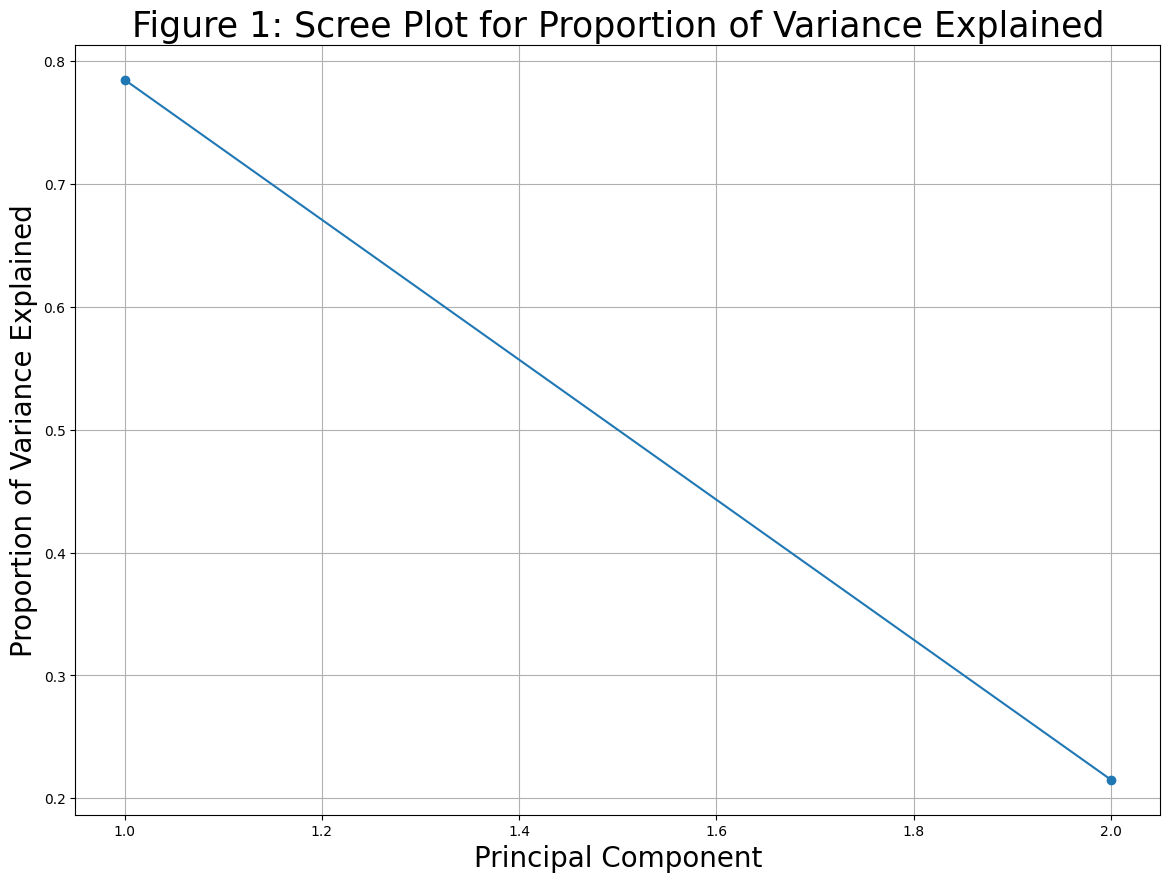

In [9]:
plt.figure(figsize=(14,10))
plt.plot(np.arange(1, len(prop_var)+1), 
                   prop_var, marker='o')
plt.xlabel('Principal Component',
           size = 20)
plt.ylabel('Proportion of Variance Explained',
           size = 20)
plt.title('Figure 1: Scree Plot for Proportion of Variance Explained',
          size = 25)
plt.grid(True)

In [8]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=np.arange(1, len(eigenvalues)+1), 
                          y=eigenvalues, mode='markers+lines'))
fig2.update_layout(
    width=700,  
    height=500,
    title=dict(
        text='Figure 4: Scree Plot for Eigenvalues',
        font=dict(
            size=20,  
        )
    ),
    xaxis=dict(
        gridcolor='lightgrey',
        linecolor='lightgrey',
        linewidth=1,
        mirror=True,
        title=dict(
            text='Principal Component',
            font=dict(
                size=16, 
            )
        )
    ),
    yaxis=dict(
        gridcolor='lightgrey',
        linecolor='lightgrey',
        linewidth=1,
        mirror=True,
        title=dict(
            text='Eigenvalue',
            font=dict(
                size=16, 
            )
        )
    ),
    plot_bgcolor='white',  
    yaxis_gridcolor='lightgrey',  
    xaxis_gridcolor='lightgrey'
)
 
fig2.add_shape(type='line', yref='y', y0=1, y1=1, xref='x', 
               x0=0.7, x1=len(eigenvalues)+0.3, 
               line=dict(color='red', width=2, dash='dash'))  
fig2.show()

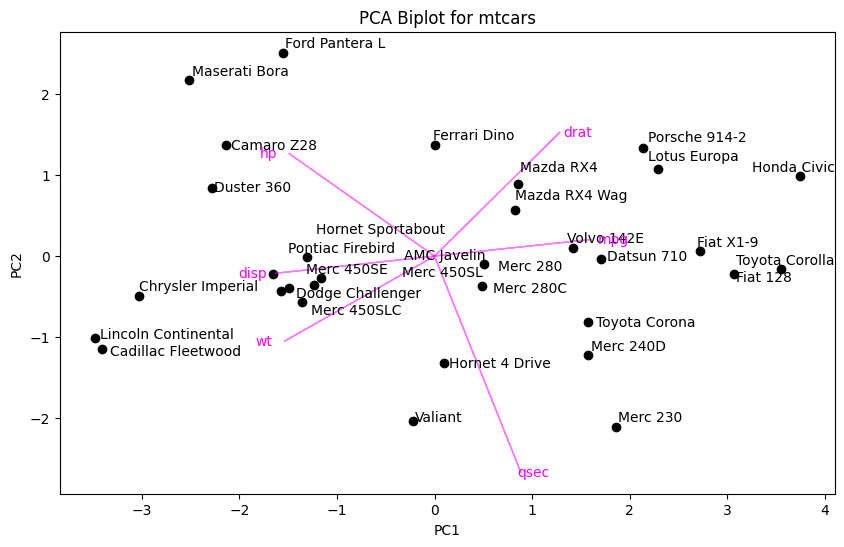

In [8]:
plt.figure(figsize=(10, 6))                                            # Set figure size
 
plt.scatter(mtcars_pca[:, 0],                                          # Plot component score scatter
            mtcars_pca[:, 1], 
            color='black')         
 
texts = []                                                             # Initialize list of texts
 
for i, txt in enumerate(mtcars.index):                                 # Label data points
    texts.append(plt.text(mtcars_pca[i, 0], 
                          mtcars_pca[i, 1], 
                          txt))
 
for i in range(len(subset_mtcars.columns)):                            # Plot loading arrows (vectors)
    plt.arrow(0,                                                       # Locate arrows
              0, 
              pca.components_[0, i]*3.5, 
              pca.components_[1, i]*3.5, 
              color='magenta',
              alpha=0.5) 
    plt.text(pca.components_[0, i]*4,                                  # Locate text
             pca.components_[1, i]*3.5, 
             subset_mtcars.columns[i], 
             color='magenta', 
             ha='center', 
             va='center') 
 
plt.title('PCA Biplot for mtcars')                                     # Plot annotations
plt.xlabel('PC1')
plt.ylabel('PC2')
 
adjust_text(texts)                                                     # Adjust text labels
 
plt.show()

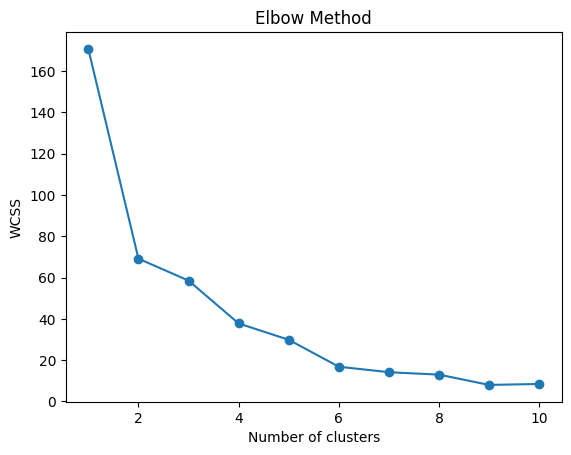

In [9]:
wcss = []                                                             # Create empty wcss list
 
for i in range(1, 11):                                                # Iterate through 11 clusters
    kmeans = KMeans(n_clusters=i)                                     # Apply kmeans clustering
    kmeans.fit(mtcars_pca)
    wcss.append(kmeans.inertia_)                                      # Append wcss to wcss list
 
plt.plot(range(1, 11), wcss, '-o')                                    # Plot Elbow graph
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4)                                          # Run cluster analysis for 4 clusters
clusters = kmeans.fit_predict(mtcars_pca)   

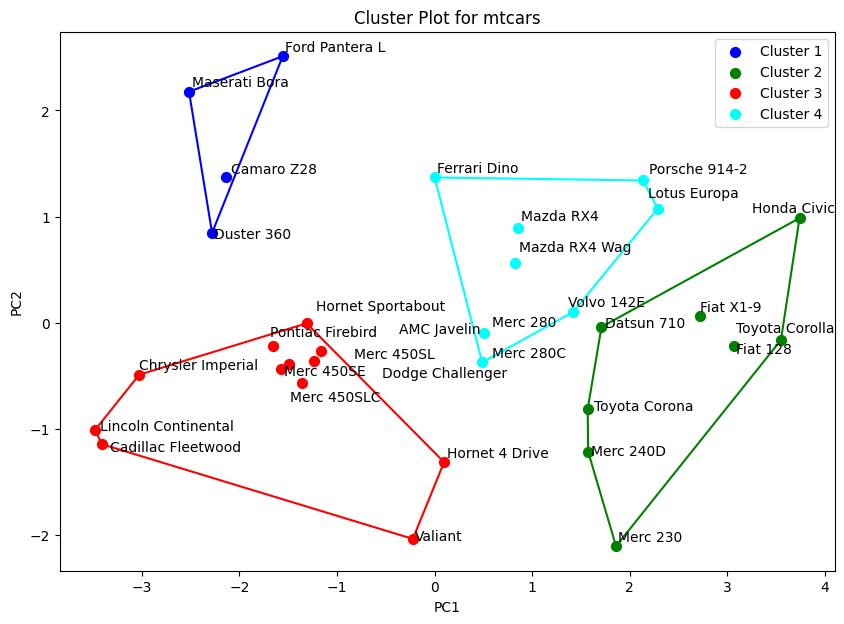

In [11]:
colors = ['blue', 'green', 'red', 'cyan']                              # Define a color map
 
texts = []                                                             # Initialize list of texts
 
plt.figure(figsize=(10, 7))                                            # Set figure size
 
for i in range(4):                                                     # Iterate through 4 clusters
    ds = mtcars_pca[np.where(clusters==i)]                             # Dataset per cluster
    plt.scatter(ds[:,0],                                               # Plot scores
                ds[:,1],
                s=50, 
                label='Cluster '+str(i+1),  
                color=colors[i])
    for point, label in zip(ds, mtcars.index[np.where(clusters==i)]):  # Label car names
        texts.append(plt.text(point[0],
                     point[1], 
                     label))
    if ds.shape[0] > 2:                                                # Check if data has >2 points
        hull = ConvexHull(ds)                                          # Compute hulls
        hull_points = np.append(hull.vertices,                         # Ensure hulls are closed
                                hull.vertices[0])
        plt.plot(ds[hull_points,0],                                    # Plot hulls
                 ds[hull_points,1], 
                 color=colors[i])
 
if texts:                                                              # Adjust texts
    adjust_text(texts)
 
plt.title('Cluster Plot for mtcars')                                   # Plot annotations
plt.xlabel('PC1')
plt.ylabel('PC2')  
plt.legend()
 
plt.show()                                                             # Print plot


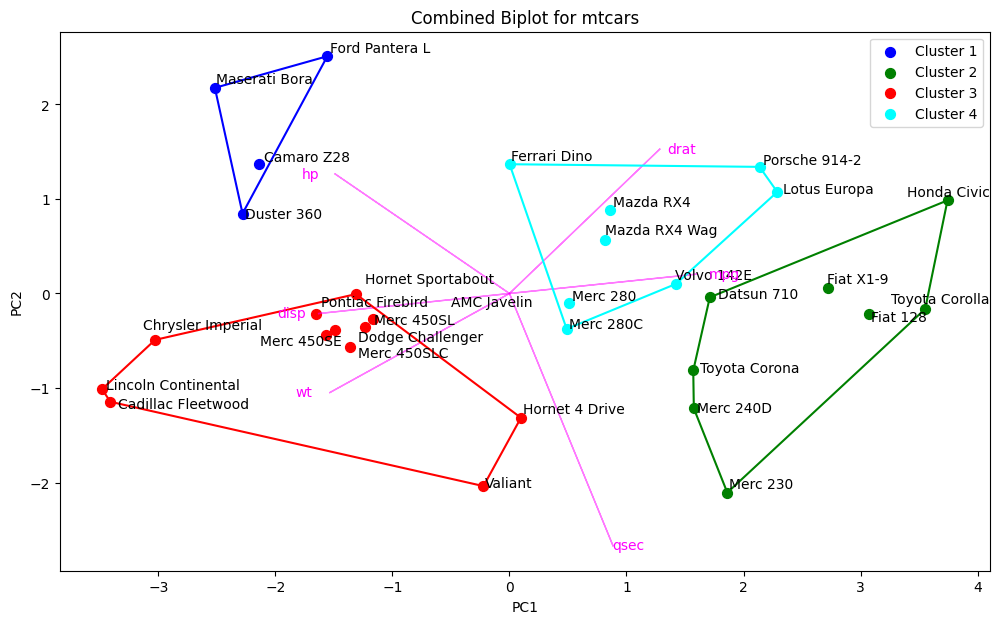

In [12]:
colors = ['blue', 'green', 'red', 'cyan']                              # Define a color map
 
texts = []                                                             # Initialize list of texts
 
plt.figure(figsize=(12, 7))                                            # Set figure size
 
for i in range(4):                                                     # Iterate through 4 clusters
    ds = mtcars_pca[np.where(clusters==i)]                             # Dataset per cluster
    plt.scatter(ds[:,0],                                               # Plot scores
                ds[:,1], 
                s=50, 
                label='Cluster '+str(i+1), 
                color=colors[i])
    for point, label in zip(ds, mtcars.index[np.where(clusters==i)]):  # Label car names
        texts.append(plt.text(point[0],
                     point[1],
                     label))
    if ds.shape[0] > 2:                                                # Check if data has >2 points
        hull = ConvexHull(ds)                                          # Compute hulls
        hull_points = np.append(hull.vertices,                         # Ensure hulls are closed
                                hull.vertices[0])
        plt.plot(ds[hull_points,0],                                    # Plot hulls
                 ds[hull_points,1], 
                 color=colors[i])
 
if texts:                                                              # Adjust data point texts
    adjust_text(texts)
 
for i in range(len(subset_mtcars.columns)):                            # Plot loading arrows (vectors)
    plt.arrow(0,                                                       # Locate arrows
              0, 
              pca.components_[0, i]*3.5, 
              pca.components_[1, i]*3.5, 
              color='magenta', 
              alpha=0.5) 
    plt.text(pca.components_[0, i]*4,                                  # Locate text
             pca.components_[1, i]*3.5, 
             subset_mtcars.columns[i], 
             color='magenta', 
             ha='center', 
             va='center') 
 
plt.title('Combined Biplot for mtcars')                                # Set title and axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
 
plt.show()                                                             